## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


¡Éxito! Te vemos en el contenido del siguiente módulo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer  # Para visualizar el número óptimo de clusters
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv('/content/costumers.csv')
df.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salario,500.0,12089.09738,5123.700116,-2911.65,8534.350,11438.600,15171.4675,30041.40
Credito_tipo_1,500.0,0.61000,0.488238,0.00,0.000,1.000,1.0000,1.00
Credito_tipo_2,500.0,0.45800,0.498732,0.00,0.000,0.000,1.0000,1.00
Limite_TC,500.0,44784.55496,22150.923996,-22207.95,30096.285,47991.515,59108.1750,118636.82
Tiempo_cliente,500.0,4.32700,4.784776,0.00,0.000,0.000,8.4000,19.30
Producto_ofrecido,500.0,0.60200,0.489976,0.00,0.000,1.000,1.0000,1.00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

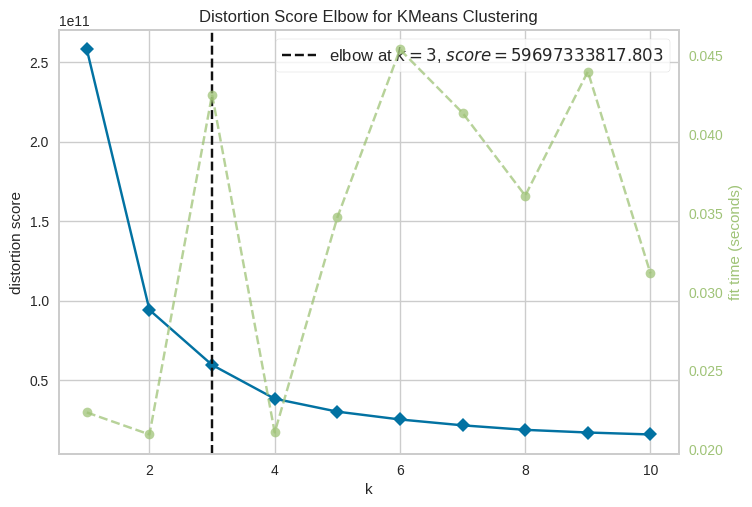

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inicializa el modelo de KMeans
modelo = KMeans()

# Inicializa el visualizador de codo para determinar el número óptimo de clusters
visualizer = KElbowVisualizer(modelo, k=(1, 11))

# Ajusta el visualizador a los datos
visualizer.fit(df)
# Muestra el gráfico del visualizador
visualizer.show()

In [ ]:
# Con las primeras 2 dimensiones, arroja hasta un 99%, cubriendo los datos casi por completo.
pca = PCA(n_components=2)
df1 = pca.fit_transform(df)
pca.explained_variance_ratio_.cumsum() # Calculamos las varianzas acumuladas explicadas


array([0.95543853, 0.99999998])

In [ ]:
df1.shape

(500, 2)

In [ ]:
# Clustering jerárquico aglomerativo
hc = AgglomerativeClustering(n_clusters = 3, metric="euclidean", linkage="ward")
predicciones_hc = hc.fit_predict(df1)
predicciones_hc

array([2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 1,
       2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2,

In [ ]:
np.unique(predicciones_hc, return_counts=True)

(array([0, 1, 2]), array([288,  68, 144]))

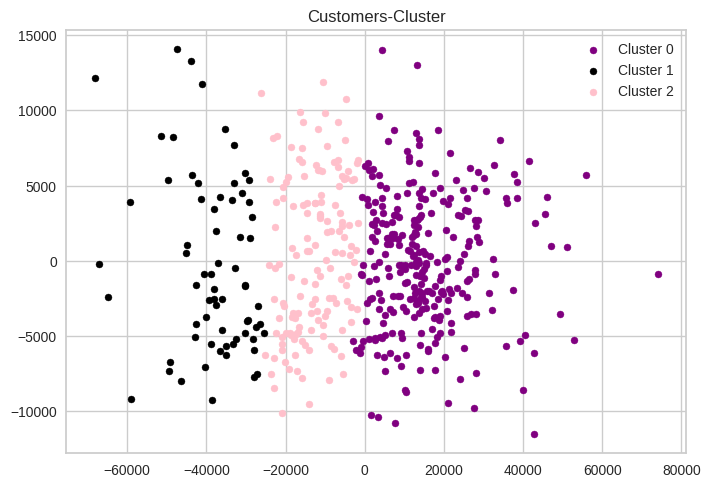

In [ ]:
# Creando un gráfico de dispersión para cada cluster
plt.scatter(df1[predicciones_hc == 0,0], df1[predicciones_hc == 0,1], s=100, marker='.', c="purple", label="Cluster 0")
plt.scatter(df1[predicciones_hc == 1,0], df1[predicciones_hc == 1,1], s=100, marker='.', c="black", label="Cluster 1")
plt.scatter(df1[predicciones_hc == 2,0], df1[predicciones_hc == 2,1], s=100, marker='.', c="pink", label="Cluster 2")
plt.title('Customers-Cluster')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(df1, predicciones_hc) #No usa el parámetro metric.
print(f'El coeficiente del índice Calinski-Harabasz es de {ch_score}.')

El coeficiente del índice Calinski-Harabasz es de 749.9757101508261.


 Para el estudio de caso, es necesario dividir a los clientes en grupos más pequeños y poder ofrecer un nuevo producto., para esto se utilizo el visualizador de codo para determinar el número óptimo de clusters, que es el numero de grupos en el que se va a segregar a los clientes; el cual dio como resultado 3.

 Ya teniendo el numero de clusters, se realiza un PCA (Análisis de componentes principales), que es la reducción de la dimensionalidad de la base de datos, es decir, si la base datos consta de 7 columnas (dimensiones) se realiza un PCA para determinar el numero de dimensiones con las cual es más óptimo trabjar, en este caso fue las primeras 2 dimensiones, ya que, arroja hasta un 99% cubriendo los datos casi por completo, y graficando de manera correcta.

 Posteriormente se hace un Clustering Jerárquico Aglomerativo, prediciendo a que segmento corresponderá cada cliente. Adicional, se puede observar la visualizacion de la predicción de los clientes segmentados.

Finalmente, se utiliza Índice Calinski-Harabasz para poder detenerminar la eficiencia del modelo de clustering, en este caso a mayor cantidad de dicho indice, los clusteres estaran mejor definidos.

In [ ]:
df_newcostumer = pd.read_csv('/content/new_costumer.csv')
df.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0


In [ ]:
df_newcostumer.describe().T

,count,mean,std,min,25%,50%,75%,max
Salario,50.0,13232.1144,5767.078320,-638.96,9783.8875,12849.835,16788.6725,23890.65
Credito_tipo_1,50.0,0.5200,0.504672,0.00,0.0000,1.000,1.0000,1.00
Credito_tipo_2,50.0,0.5000,0.505076,0.00,0.0000,0.500,1.0000,1.00
Limite_TC,50.0,38422.6698,20240.655015,-2756.45,22922.6175,39054.305,52052.3200,83578.93
Tiempo_cliente,50.0,2.9440,3.973338,0.00,0.0000,0.000,6.3500,11.30
Producto_ofrecido,50.0,0.7000,0.462910,0.00,0.0000,1.000,1.0000,1.00
Tipo_de_cliente,50.0,1.3800,1.122861,0.00,0.0000,1.000,2.0000,3.00


In [ ]:
pca = PCA(n_components=2)
df_newcostumer1 = pca.fit_transform(df_newcostumer)
pca.explained_variance_ratio_.cumsum()

array([0.95222838, 0.99999997])

In [ ]:
# Clustering jerárquico aglomerativo
hc_newcustomer = AgglomerativeClustering(n_clusters = 3, metric="euclidean", linkage="ward")
prediccioneshc_newcustomer = hc_newcustomer.fit_predict(df_newcostumer1)
prediccioneshc_newcustomer

array([1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0,
       1, 0, 1, 2, 0, 2])

In [ ]:
np.unique(predicciones_hc, return_counts=True)

(array([0, 1, 2]), array([15, 22, 13]))

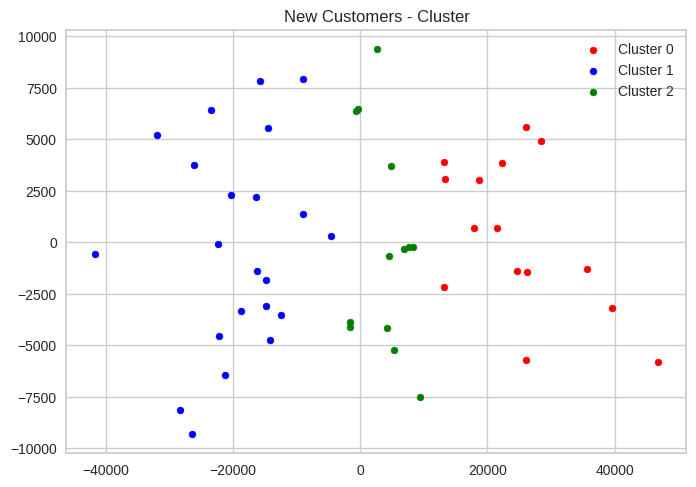

In [ ]:
# Creando un gráfico de dispersión para cada cluster
plt.scatter(df_newcostumer1[prediccioneshc_newcustomer == 0,0], df_newcostumer1[prediccioneshc_newcustomer == 0,1], s=100, marker='.', c="red", label="Cluster 0")
plt.scatter(df_newcostumer1[prediccioneshc_newcustomer == 1,0], df_newcostumer1[prediccioneshc_newcustomer == 1,1], s=100, marker='.', c="blue", label="Cluster 1")
plt.scatter(df_newcostumer1[prediccioneshc_newcustomer == 2,0], df_newcostumer1[prediccioneshc_newcustomer == 2,1], s=100, marker='.', c="green", label="Cluster 2")
plt.title('New Customers - Cluster')
plt.legend()
plt.show()